In [81]:
import pandas as pd
import cv2 as cv 
import numpy as np 
import matplotlib.pyplot as plt 
import skimage.filters as flt 
import seaborn as sns 
import warnings as warner 
import pandas as pd 
import clustimage as cl

from sklearn.cluster import KMeans 
from sklearn.cluster import AgglomerativeClustering 
warner.simplefilter('ignore')


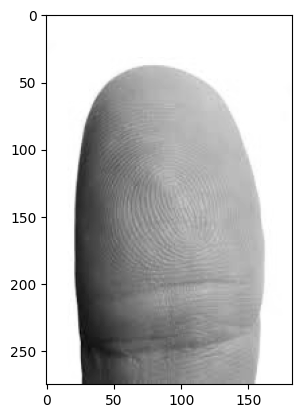

In [82]:
thumb = cv.cvtColor(cv.imread('Images/thumb.jpeg'), cv.COLOR_BGR2GRAY)
thumb_float = np.float32(thumb)
plt.imshow(thumb, cmap='gray')
plt.show()

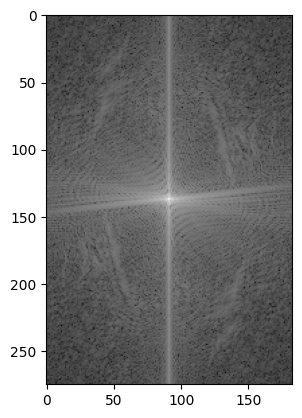

In [83]:
norm_thumb = cv.normalize(thumb_float, None, 0, 1, cv.NORM_MINMAX)
dft_thumb = cv.dft(norm_thumb, flags = cv.DFT_COMPLEX_OUTPUT)
dft_thumb_shift = np.fft.fftshift(dft_thumb)
transform = cv.magnitude(dft_thumb_shift[:, :, 0], dft_thumb_shift[:, :, 1])
log_transform = np.log(transform)
plt.imshow(log_transform, cmap='gray')
plt.show()

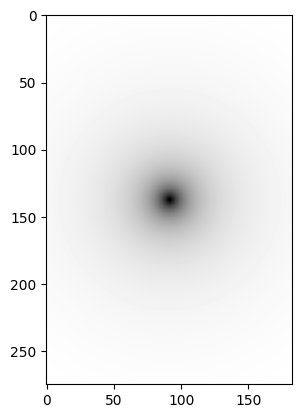

In [84]:
def butterworth(img, D0, n):
    
    M, N = img.shape 
    h_img = np.zeros((M, N))
    for x in range(M):
        for y in range(N):
            D = np.sqrt((x - M/2)**2 + (y - N/2)**2)
            h_img[x, y] = 1/ (1 + (D0/D)**(2*n)) 
    return h_img 

filtered_thumb = butterworth(transform, 10, 0.6)
log_filtered_thumb = filtered_thumb


plt.imshow(log_filtered_thumb, cmap='gray')
plt.show()


In [85]:
unshift_img = np.fft.ifftshift(filtered_thumb)

In [86]:
thumb_idft = cv.idft(unshift_img, flags=cv.DFT_COMPLEX_OUTPUT)

In [87]:
thumb_idft

array([[ 45771.53699451, -29718.79928487,  -1080.40144659, ...,
          9054.62567489,  -1126.19528503,  29567.23388173],
       [ -1720.95625218,    463.30159024,   -896.05448282, ...,
          -903.59880703,   -922.96458078,   -857.16774898],
       [  -581.74629776,     97.70787503,   -448.33064544, ...,
          -344.24328438,   -464.54112216,   -205.21476771],
       ...,
       [  -328.50442708,    100.57376706,   -245.34040141, ...,
          -133.91987202,   -253.89699519,    -65.99468087],
       [  -608.33643846,     90.38156731,   -470.14887215, ...,
          -330.59351545,   -484.23225976,   -198.96021277],
       [ -1438.75469453,    766.73075776,   -596.03265466, ...,
          -568.04586886,   -621.12007926,   -523.87443725]])

In [88]:
unshifted = np.fft.ifftshift(transform)

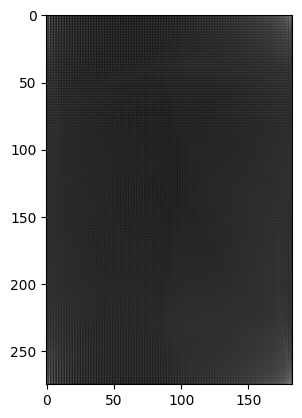

In [89]:
unshifted_inverted = cv.idft(unshifted)
plt.imshow(cv.normalize(unshifted_inverted, None, 0, 1, cv.NORM_MINMAX), cmap='gray')  

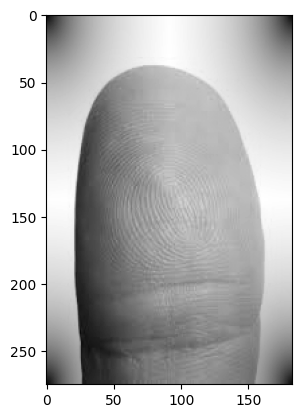

In [90]:
transformed_thumb = np.fft.fft2(thumb)
shift_transformed_thumb = np.fft.fftshift(transformed_thumb) 
filtered_thumb = flt.butterworth(shift_transformed_thumb, 0.16, True, 0.5)
unshift_transformed_thumb = np.fft.ifftshift(filtered_thumb)
invert_thumb = np.fft.ifft2(unshift_transformed_thumb)
plt.imshow(np.abs(invert_thumb).astype(np.int32), cmap='gray') 

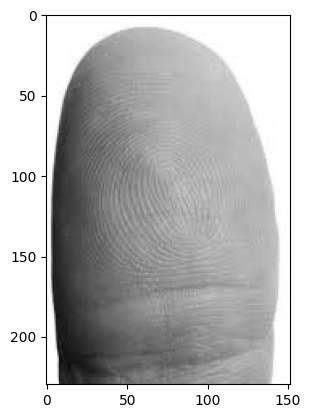

In [91]:
plt.imshow(thumb[30:260, 18:170], cmap='gray') 

In [92]:
just_thumb = thumb[30:260, 18:170]
transformed_thumb = np.fft.fft2(just_thumb)
shift_transformed_thumb = np.abs(np.fft.fftshift(transformed_thumb)) 
log_transformed_thumb = np.log(shift_transformed_thumb) 
filtered_thumb = flt.butterworth(shift_transformed_thumb)
unshift_transformed_thumb = np.fft.ifftshift(filtered_thumb)
invert_thumb = np.fft.ifft2(unshift_transformed_thumb)

In [93]:
thumb_og = thumb.copy()
thumb = just_thumb.copy()
thumb

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [254, 254, 255, ..., 255, 255, 255],
       [254, 254, 255, ..., 255, 255, 255],
       [254, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [94]:
def laplacian(img, c = 1e-4):
    M, N = img.shape 
    H = np.zeros((M, N))
    trf_img = np.fft.fft2(img)
    for x in range(M):
        for y in range(N):
            H[x, y] = -4*(np.pi**2)*(x**2 + y**2)

    filtered_img = img + c*H
    reform = np.abs(np.fft.ifft2(filtered_img)) 
    return reform

filtered_img = laplacian(thumb)
filtered_img.min()

0.00012721529131898358

array([[0.58561312, 0.57747065, 0.56588667, ..., 0.5877652 , 0.58919753,
        0.58909439],
       [0.58643864, 0.58074284, 0.57149858, ..., 0.5866107 , 0.58792495,
        0.58838198],
       [0.58697425, 0.5835723 , 0.57690694, ..., 0.58550853, 0.58668406,
        0.58758051],
       ...,
       [0.57769584, 0.56256073, 0.54986609, ..., 0.59094018, 0.5926951 ,
        0.59084118],
       [0.57855983, 0.56559457, 0.55495577, ..., 0.58998347, 0.59162747,
        0.59030606],
       [0.57954769, 0.57404398, 0.56034541, ..., 0.58890981, 0.59044985,
        0.5897336 ]])

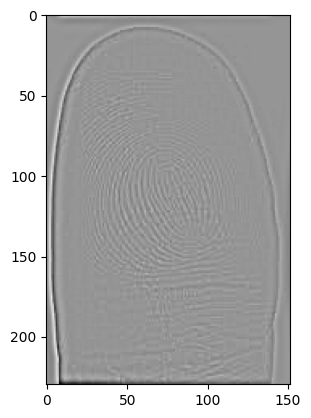

In [95]:
raw_img = flt.butterworth(thumb, 0.12, True, 3)
norm_img = cv.normalize(raw_img, None, 0, 1, cv.NORM_MINMAX)
plt.imshow(norm_img, cmap='gray')  
norm_img

In [96]:
img_arr = norm_img.flatten()
model = KMeans(n_clusters=2)
model.fit(img_arr.reshape(-1, 1))
classes = model.predict(img_arr.reshape(-1, 1))

In [97]:
pd.Series(classes).value_counts()

1    31278
0     3682
Name: count, dtype: int64

0         Axes(0.1,0.15;0.363636x0.75)
1    Axes(0.536364,0.15;0.363636x0.75)
dtype: object

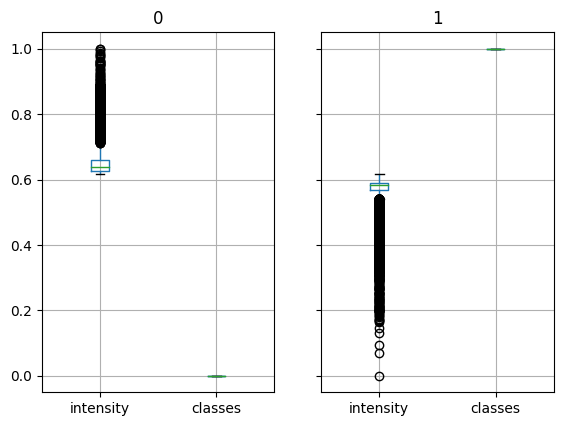

In [98]:
df = pd.DataFrame({'intensity':img_arr, 'classes':classes})
df.groupby('classes').boxplot()

<Axes: xlabel='classes', ylabel='intensity'>

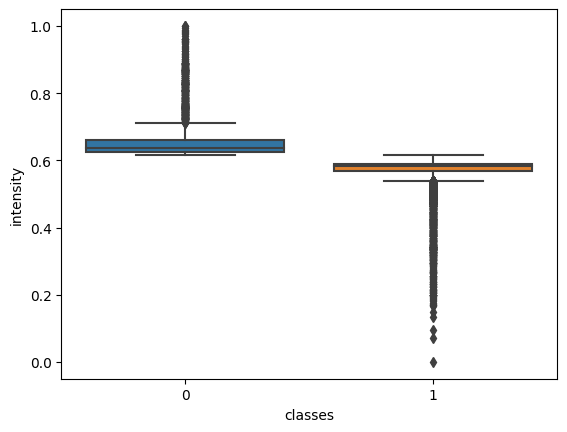

In [99]:
sns.boxplot(data = df, x = 'classes', y = 'intensity')

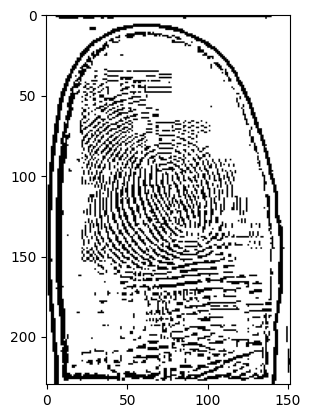

In [100]:
img = np.where(norm_img > 0.596, 0, 1)
plt.imshow(img, cmap='gray')

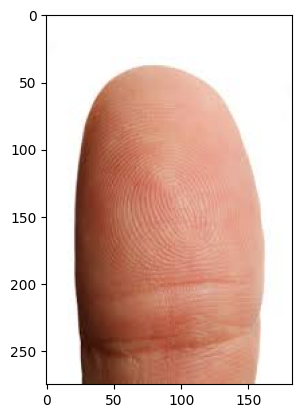

In [101]:
thumb_RGB = cv.cvtColor(cv.imread('Images/thumb.jpeg'), cv.COLOR_BGR2RGB) 
plt.imshow(thumb_RGB)


In [102]:
CI = cl.Clustimage(method='hog', dim=[128, 128])
thumb_rgb_resized = cv.resize(thumb_RGB, (128, 128))
thumb_gray_resized = cv.cvtColor(thumb_rgb_resized, cv.COLOR_RGB2GRAY)
hog_thumb = CI.extract_hog(thumb_gray_resized, pixels_per_cell=(8, 8), orientations=8, flatten=False)
plt.imshow(hog_thumb)


[clustimage] >WARNING> Parameter grayscale is set to True coz you are using method="hog"
[clustimage] >INFO> filepath is set to [C:\Users\hp\AppData\Local\Temp\clustimage]
[clustimage] >INFO> filepath is set to [C:\Users\hp\AppData\Local\Temp\clustimage]
[clustimage] >INFO> filepath is set to [C:\Users\hp\AppData\Local\Temp\clustimage]
[clustimage] >ERROR> The default dim=[128, 128] of the image does not match with the input: [11, 11]. Set dim=[11, 11] during initialization!


Exception: None

In [65]:
cv.resize(thumb_RGB, (128, 128))

array([[[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [74]:
thumb_rgb_resized.shape

(128, 128, 3)

[clustimage] >WARNING> Parameter grayscale is set to True coz you are using method="hog"
[clustimage] >INFO> filepath is set to [C:\Users\hp\AppData\Local\Temp\clustimage]
[clustimage] >INFO> filepath is set to [C:\Users\hp\AppData\Local\Temp\clustimage]
[clustimage] >INFO> filepath is set to [C:\Users\hp\AppData\Local\Temp\clustimage]
[clustimage] >INFO> Store examples at [c:\Users\hp\OneDrive\Desktop\Spring_Semester_2023\ImageProcessing\Chapter_4_Code\chap-4\lib\site-packages\clustimage\data]..
[clustimage] >INFO> Downloading [flowers] dataset from github source..
[clustimage] >INFO> Extracting files..
[clustimage] >INFO> [214] files are collected recursively from path: [c:\Users\hp\OneDrive\Desktop\Spring_Semester_2023\ImageProcessing\Chapter_4_Code\chap-4\lib\site-packages\clustimage\data\flower_images]
100%|██████████| 1/1 [00:00<00:00, 22.89it/s]


ValueError: cannot reshape array of size 65536 into shape (128,128)

<Figure size 640x480 with 0 Axes>

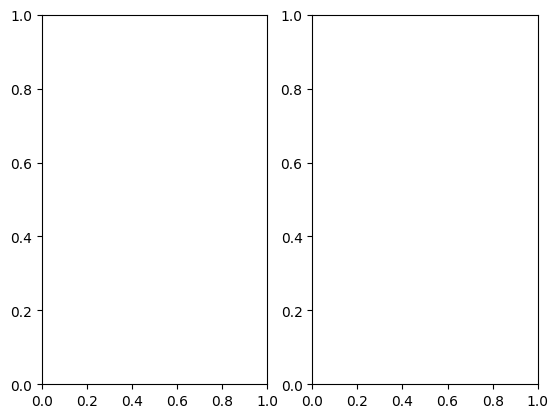

In [103]:
import matplotlib.pyplot as plt
from clustimage import Clustimage

cl = Clustimage(method='hog')


pathnames = cl.import_example(data='flowers')

img = cl.imread(pathnames[0], dim=(128,128), colorscale=0)

img_hog = cl.extract_hog(img)

plt.figure();
fig,axs=plt.subplots(1,2)
axs[0].imshow(img.reshape(128,128))
axs[0].axis('off')
axs[0].set_title('Preprocessed image', fontsize=10)
axs[1].imshow(img_hog.reshape(128,128), cmap='binary')
axs[1].axis('off')
axs[1].set_title('HOG', fontsize=10)

In [104]:
img

array([ 10,  22,  13, ...,  74, 117, 255], dtype=uint8)